# Flights Data Exploration

In this practice, we'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

The plan is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*

### Clean the data

In [2]:
# Handling Missing Values

# Check if there are missing values
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [3]:
# Select all rows with any column value being missing
df_flights[df_flights.isnull().any(axis=1)]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


In [4]:
# Oberseved the rows with missing DepDel15 values seem to have DepDelay all being zero
# Experiment to check if true
df_sample = df_flights.copy()
df_sample = df_sample[df_sample.isnull().any(axis=1)]
df_sample[df_sample.DepDelay == 0].DepDel15.isnull().sum()

2761

In [5]:
df_sample.DepDel15 = df_sample.DepDel15.fillna(0)
df_sample[df_sample.DepDelay == 0].DepDel15.isnull().sum()

0

In [6]:
# Fill in missing values
df_flights.DepDel15 = df_flights.DepDel15.fillna(0)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [7]:
# Handling Outliers

def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()


Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00

Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



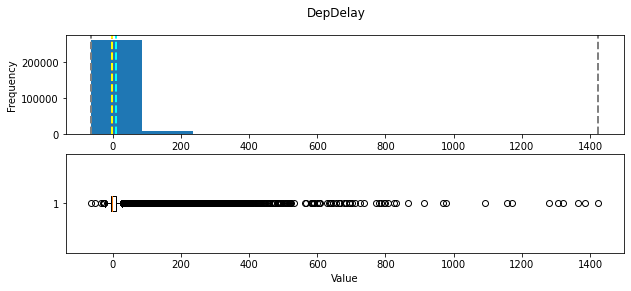

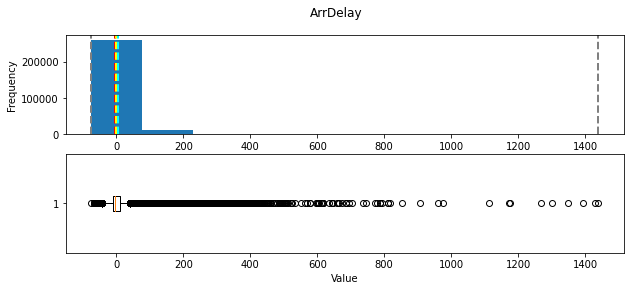

In [8]:
%matplotlib inline
show_distribution(df_flights.DepDelay)
show_distribution(df_flights.ArrDelay)

Minimum:-11.00
Mean:-0.24
Median:-2.00
Mode:-3.00
Maximum:21.00

Minimum:-32.00
Mean:-4.42
Median:-5.00
Mode:0.00
Maximum:37.00



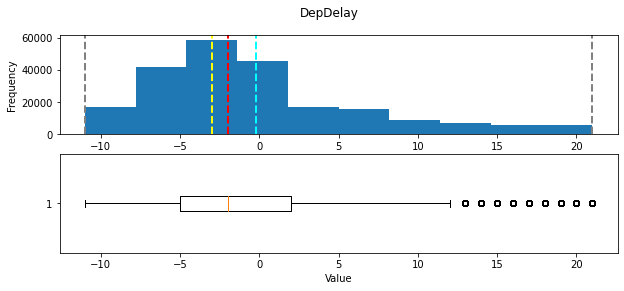

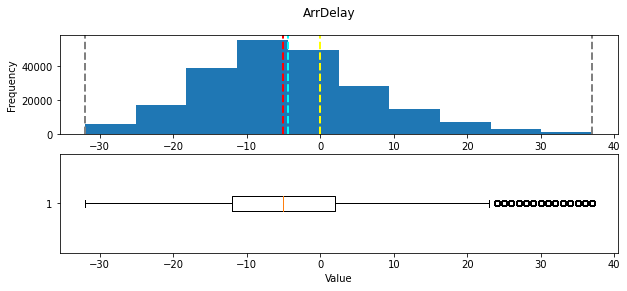

In [9]:
# Remove outliers
DepDelay_01pcntile = df_flights.DepDelay.quantile(0.01)
DepDelay_90pcntile = df_flights.DepDelay.quantile(0.85)
ArrDelay_01pcntile = df_flights.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[df_flights.DepDelay > DepDelay_01pcntile]
df_flights = df_flights[df_flights.DepDelay < DepDelay_90pcntile]
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_01pcntile]
df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90pcntile]

# Determine The Distribution Of The DepDelay And ArrDelay
show_distribution(df_flights.DepDelay)
show_distribution(df_flights.ArrDelay)


### Explore the cleaned data

In [10]:
# View Summary Statistics for the Numeric Fields
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,222086.0,222086.000000,222086.000000,222086.000000,222086.000000,222086.000000,222086.000000,222086.000000,222086.00000,222086.000000,222086.000000,222086.000000,222086.000000
mean,2013.0,7.017520,15.801779,3.902547,12754.730870,12730.174982,1285.433224,-0.236647,0.05211,1467.953198,-4.421652,0.080644,0.012801
std,0.0,2.004222,8.852599,1.996342,1509.567997,1506.399802,469.471032,6.679342,0.22225,486.603067,11.823515,0.272289,0.112417
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.00000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,855.000000,-5.000000,0.00000,1058.000000,-12.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1241.000000,-2.000000,0.00000,1450.000000,-5.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1658.000000,2.000000,0.00000,1850.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,21.000000,1.00000,2359.000000,37.000000,1.000000,1.000000


#### What are the average (mean) departure and arrival delays?

In [11]:
print(df_flights['DepDelay'].mean())
print(df_flights['ArrDelay'].mean())

-0.23664706465063085
-4.42165197265924


#### How do the carriers compare in terms of arrival delay performance?

           count      mean        std   min   25%  50%  75%   max
Carrier                                                          
9E        6520.0 -7.127301  11.722833 -32.0 -15.0 -8.0  0.0  37.0
AA       23189.0 -5.258010  12.336254 -32.0 -14.0 -6.0  2.0  37.0
AS        5786.0 -3.299862  11.870467 -32.0 -11.0 -4.0  4.0  37.0
B6        9406.0 -5.276951  12.694721 -32.0 -14.0 -7.0  2.0  37.0
DL       33474.0 -6.181872  11.508378 -32.0 -14.0 -7.0  0.0  37.0
EV       12165.0 -6.246363  12.047828 -32.0 -15.0 -8.0  0.0  37.0
F9        2874.0  0.093946  10.662017 -31.0  -7.0 -1.0  6.0  37.0
FL        7749.0 -3.258098  11.799673 -32.0 -12.0 -4.0  4.0  37.0
HA        1747.0 -2.109903   9.015162 -32.0  -7.0 -3.0  2.0  35.0
MQ        8712.0 -3.610193  12.252576 -32.0 -12.0 -5.0  3.0  37.0
OO       13513.0 -3.792274  10.867616 -32.0 -11.0 -5.0  2.0  37.0
UA       22608.0 -7.026318  12.977050 -32.0 -16.0 -8.0  0.0  37.0
US       20434.0 -3.534991  12.188349 -32.0 -12.0 -5.0  4.0  37.0
VX        

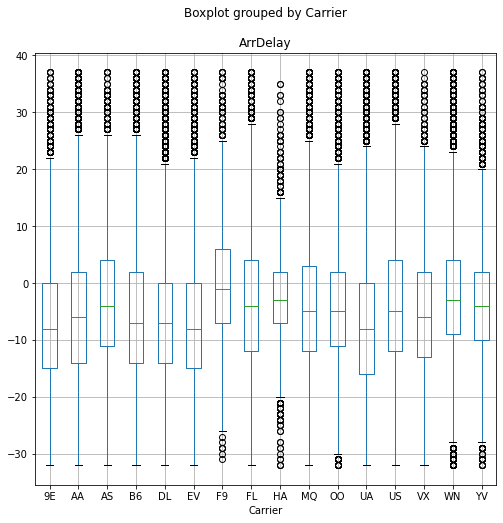

In [12]:
carrier_arrdelay = df_flights.groupby(df_flights.Carrier)['ArrDelay']
print(carrier_arrdelay.describe())
#print(carrier_arrdelay.mean().sort_values())

df_flights.boxplot(column='ArrDelay', by='Carrier', figsize=(8,8))

#### Is there a noticable difference in arrival delays for different days of the week?

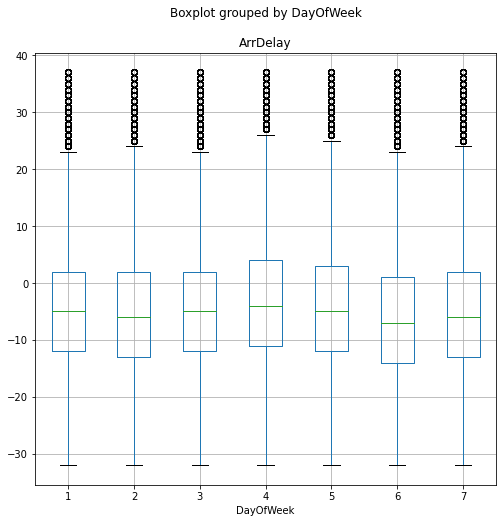

In [13]:
df_flights.boxplot(column='ArrDelay', by='DayOfWeek', figsize=(8,8))

There is not a noticable difference in arrival delays for different days of the week.

#### Which departure airport has the highest average departure delay?

,,DepDelay
OriginAirportID,OriginAirportName,
13232,Chicago Midway International,3.703071
11259,Dallas Love Field,3.103554
12191,William P Hobby,2.629518
11292,Denver International,1.771275
10821,Baltimore/Washington International Thurgood Marshall,1.727492
...,...,...
13830,Kahului Airport,-2.501484
10299,Ted Stevens Anchorage International,-2.554859
15376,Tucson International,-2.574468


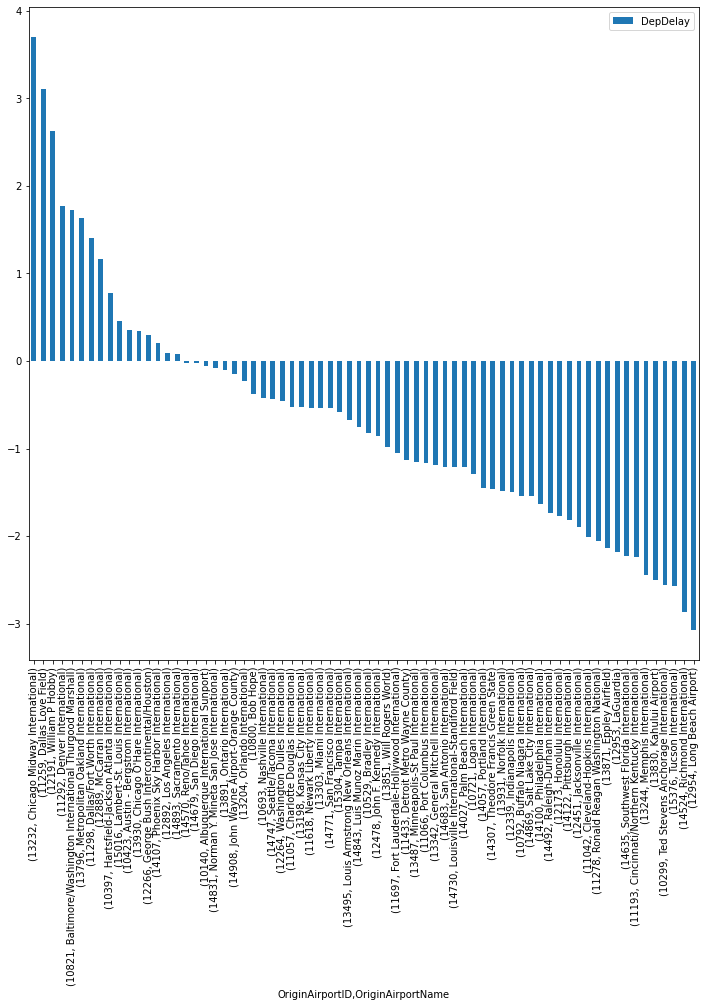

In [14]:
#carrier_depdelay = df_flights.groupby(df_flights.OriginAirportName)['DepDelay']
carrier_depdelay = df_flights.groupby(['OriginAirportID', 'OriginAirportName'])['DepDelay']
#pd.DataFrame(carrier_depdelay.mean().nlargest(3))
mean_depdelay = pd.DataFrame(carrier_depdelay.mean().sort_values(ascending=False))
mean_depdelay.plot(kind='bar', figsize=(12,12))
mean_depdelay

#### Do late departures tend to result in longer arrival delays than on-time departures?

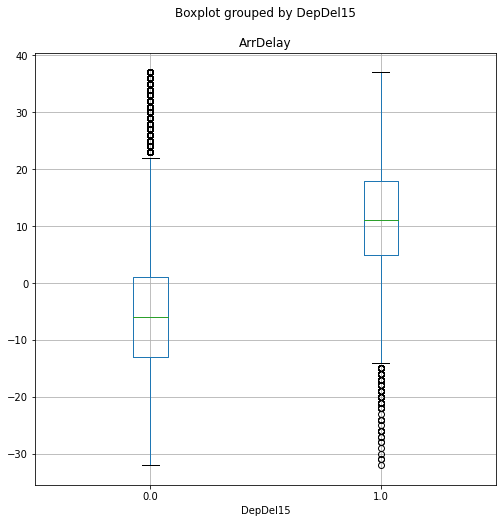

In [15]:
df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(8,8))

Yes, late departures tend to result in longer arrival delays than on-time departures.

#### Which route (from origin airport to destination airport) has the most late arrivals?

In [16]:
carrier_arrdel15 = df_flights.groupby(['OriginAirportID', 'OriginAirportName', 
                                       'DestAirportID', 'DestAirportName'])['ArrDel15']
pd.DataFrame(carrier_arrdel15.sum().nlargest(3))
#print(carrier_depdel15.sum().sort_values(ascending=False).head(10))

,,,,ArrDel15
OriginAirportID,OriginAirportName,DestAirportID,DestAirportName,
14771,San Francisco International,12892,Los Angeles International,99
12892,Los Angeles International,14771,San Francisco International,88
12953,LaGuardia,10397,Hartsfield-Jackson Atlanta International,73


#### Which route has the highest average arrival delay?

In [17]:
carrier_arrdelay = df_flights.groupby(['OriginAirportID', 'OriginAirportName', 
                                       'DestAirportID', 'DestAirportName'])['ArrDelay']
pd.DataFrame(carrier_arrdelay.mean().nlargest(3))

,,,,ArrDelay
OriginAirportID,OriginAirportName,DestAirportID,DestAirportName,
13495,Louis Armstrong New Orleans International,11278,Ronald Reagan Washington National,25.333333
11042,Cleveland-Hopkins International,14027,Palm Beach International,18.000000
12478,John F. Kennedy International,14730,Louisville International-Standiford Field,18.000000
